In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')

In [46]:
palette = sns.color_palette("Blues_r")

In [47]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [48]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [49]:
# Orders + Payments
df = orders.merge(payments, on='order_id', how='inner')

# Items Infos
df = df.merge(order_items[['order_id', 'product_id', 'price', 'freight_value']], on='order_id')

# Products and Categories
df = df.merge(products[['product_id', 'product_category_name']], on='product_id')

# Clients Infos
df = df.merge(customers[['customer_id', 'customer_city', 'customer_state']], on='customer_id')

In [50]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

In [51]:
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')

In [52]:
df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,15
order_delivered_carrier_date,1245
order_delivered_customer_date,2567
order_estimated_delivery_date,0
payment_sequential,0
payment_type,0


In [53]:
df = df[~df['order_delivered_customer_date'].isna()]
df = df[~df['order_approved_at'].isna()]
df['product_category_name'] = df['product_category_name'].fillna('unknown')

In [54]:
df.to_csv('olist_base_tratada.csv', index=False)

In [55]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,product_id,price,freight_value,product_category_name,customer_city,customer_state,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,sao paulo,SP,2017-10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,sao paulo,SP,2017-10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,87285b34884572647811a353c7ac498a,29.99,8.72,utilidades_domesticas,sao paulo,SP,2017-10
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,perfumaria,barreiras,BA,2018-07
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12,aa4383b373c6aca5d8797843e5594415,159.90,19.22,automotivo,vianopolis,GO,2018-08


/tmp/ipython-input-56-831575293.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categorias.values, y=top_categorias.index, palette=palette)
/tmp/ipython-input-56-831575293.py:4: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=top_categorias.values, y=top_categorias.index, palette=palette)


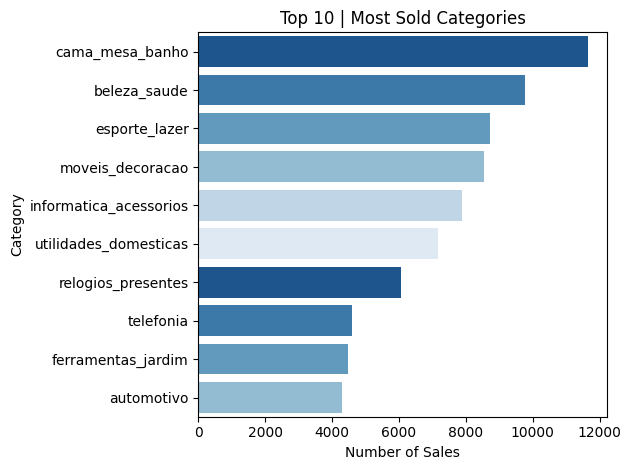

In [56]:
palette = sns.color_palette("Blues_r")

top_categorias = df['product_category_name'].value_counts().head(10)
sns.barplot(x=top_categorias.values, y=top_categorias.index, palette=palette)
plt.title('Top 10 | Most Sold Categories')
plt.xlabel('Number of Sales')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

/tmp/ipython-input-57-2717340169.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-57-2717340169.py:10: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


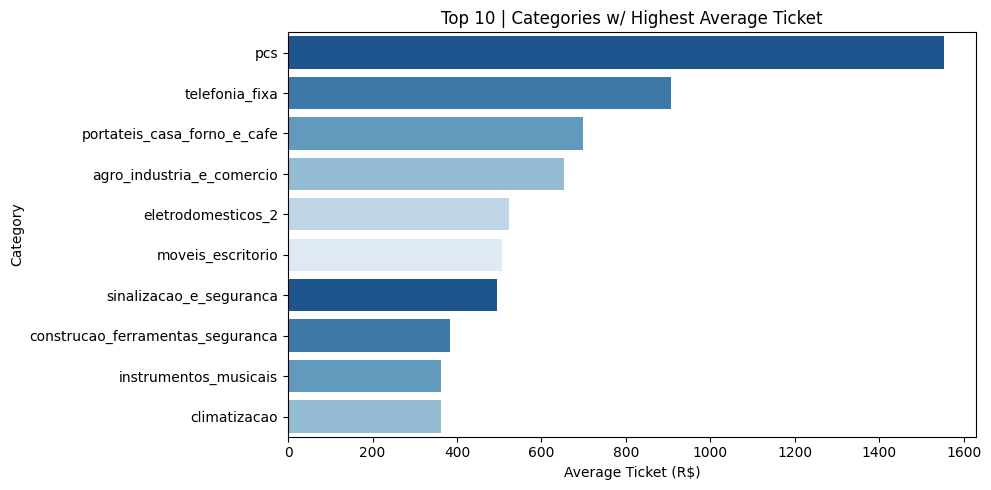

In [57]:
ticket_categoria = df.groupby('product_category_name').agg({
    'payment_value': 'sum',
    'order_id': 'nunique'
})

ticket_categoria['ticket_medio'] = ticket_categoria['payment_value'] / ticket_categoria['order_id']
ticket_categoria = ticket_categoria.sort_values('ticket_medio', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=ticket_categoria['ticket_medio'],
    y=ticket_categoria.index,
    palette=palette
)
plt.title('Top 10 | Categories w/ Highest Average Ticket')
plt.xlabel('Average Ticket (R$)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

/tmp/ipython-input-64-748368107.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-64-748368107.py:12: UserWarning: 
The palette list has fewer values (6) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


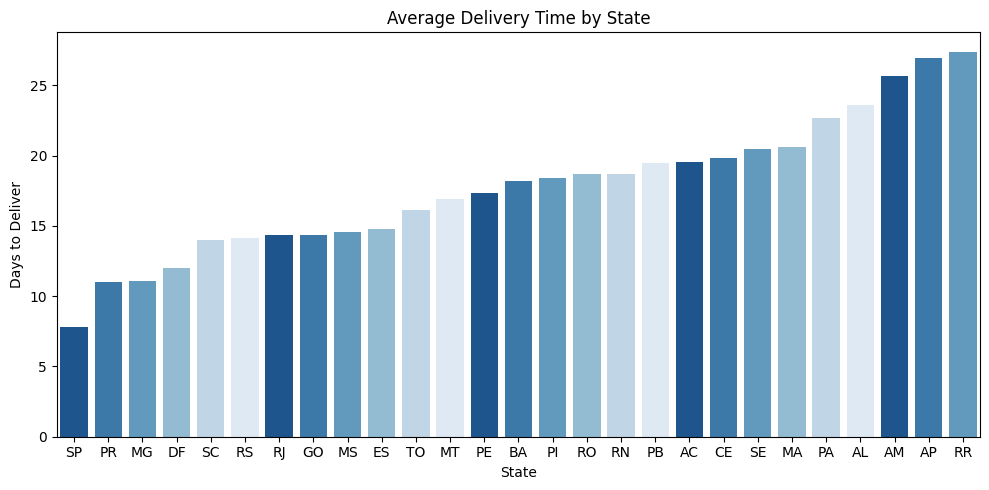

In [64]:
# Adjust columms to datetime
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])

# Calculate delivery time
df['tempo_entrega'] = (df['order_delivered_customer_date'] - df['order_approved_at']).dt.days

# Group by State
entrega_estado = df.groupby('customer_state')['tempo_entrega'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(
    x=entrega_estado.index,
    y=entrega_estado.values,
    palette=palette
)
plt.title('Average Delivery Time by State')
plt.xlabel('State')
plt.ylabel('Days to Deliver')
plt.tight_layout()
plt.show()

/tmp/ipython-input-59-3991069251.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ticket_estado.reset_index(), x='customer_state', y='ticket_medio', palette=palette)
/tmp/ipython-input-59-3991069251.py:9: UserWarning: 
The palette list has fewer values (6) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=ticket_estado.reset_index(), x='customer_state', y='ticket_medio', palette=palette)


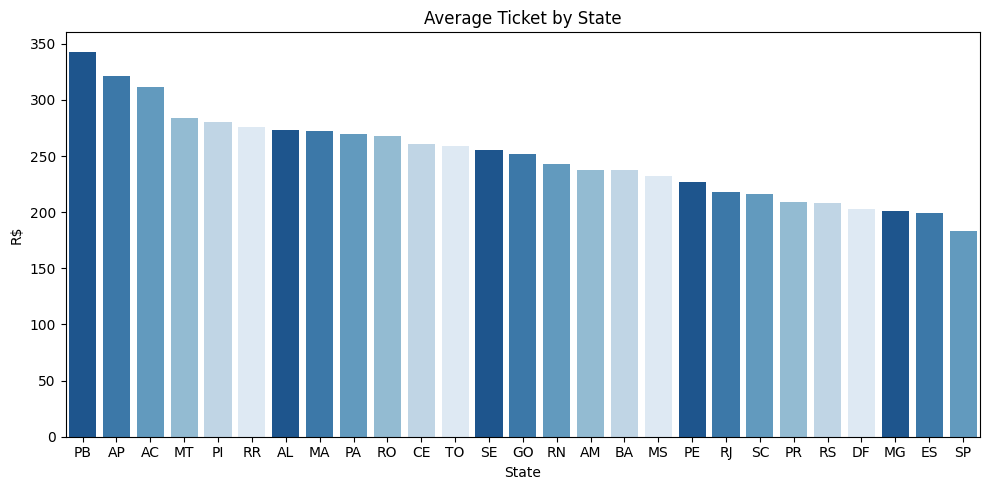

In [59]:
ticket_estado = df.groupby('customer_state').agg({
    'payment_value': 'sum',
    'order_id': 'nunique'
})
ticket_estado['ticket_medio'] = ticket_estado['payment_value'] / ticket_estado['order_id']
ticket_estado = ticket_estado.sort_values('ticket_medio', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=ticket_estado.reset_index(), x='customer_state', y='ticket_medio', palette=palette)
plt.title('Average Ticket by State')
plt.ylabel('R$')
plt.xlabel('State')
plt.tight_layout()
plt.show()

/tmp/ipython-input-60-3420479773.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pedidos_estado.index, y=pedidos_estado.values, palette=palette)
/tmp/ipython-input-60-3420479773.py:4: UserWarning: 
The palette list has fewer values (6) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=pedidos_estado.index, y=pedidos_estado.values, palette=palette)


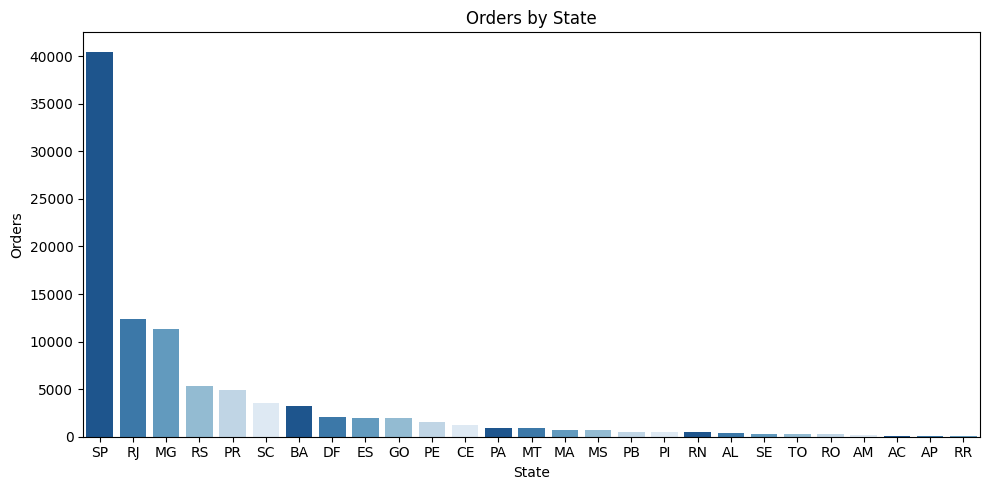

In [60]:
pedidos_estado = df.groupby('customer_state')['order_id'].nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=pedidos_estado.index, y=pedidos_estado.values, palette=palette)
plt.title('Orders by State')
plt.xlabel('State')
plt.ylabel('Orders')
plt.tight_layout()
plt.show()

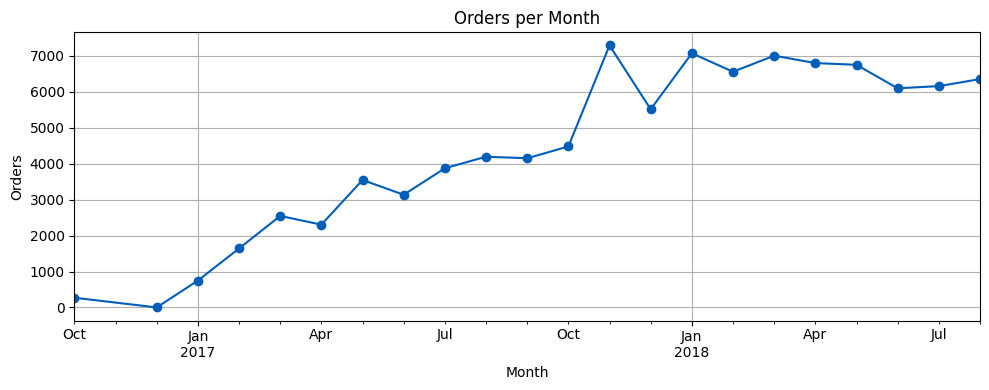

In [61]:
# Grouping by Month
df['order_month'] = pd.to_datetime(df['order_purchase_timestamp']).dt.to_period('M')
sales_month = df.groupby('order_month')['order_id'].nunique()

sales_month.plot(kind='line', figsize=(10, 4), marker='o', color='#005EB8')
plt.title('Orders per Month')
plt.ylabel('Orders')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-62-77977059.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='review_score', y='freight_value', data=df_avaliacoes, palette=palette)
/tmp/ipython-input-62-77977059.py:5: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.boxplot(x='review_score', y='freight_value', data=df_avaliacoes, palette=palette)


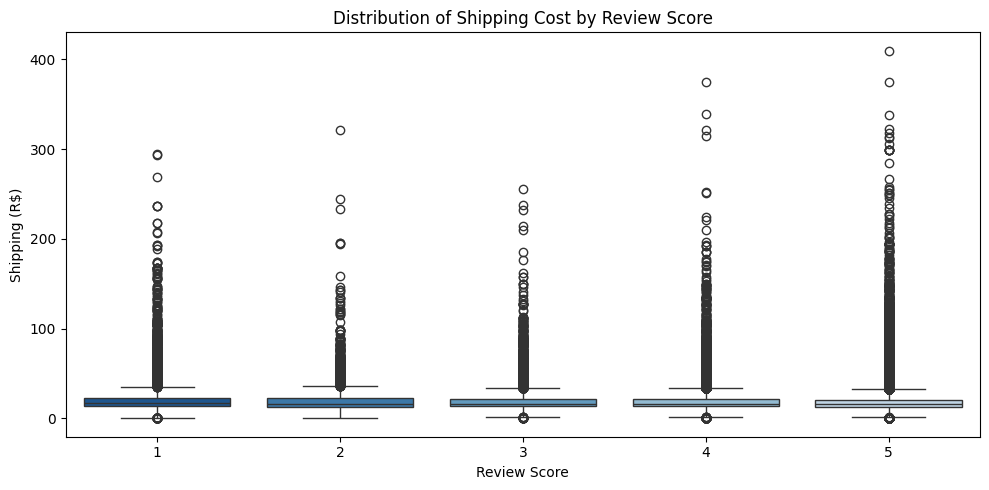

In [62]:
# Grouping average delivery time by review score
df_avaliacoes = df.merge(reviews[['order_id', 'review_score']], on='order_id')

plt.figure(figsize=(10, 5))
sns.boxplot(x='review_score', y='freight_value', data=df_avaliacoes, palette=palette)
plt.title('Distribution of Shipping Cost by Review Score')
plt.xlabel('Review Score')
plt.ylabel('Shipping (R$)')
plt.tight_layout()
plt.show()